In [1]:
import hail as hl
import pyspark
from hail.plot import show
hl.plot.output_notebook()

from bokeh.plotting import output_file, save, reset_output

sc = pyspark.SparkContext()
tmp_dir = "hdfs://spark-master:9820/"
lustre_dir = "file:///lustre/scratch123/qc/"
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference="GRCh38")

Loading BokehJS ...

2022-08-15 14:28:56 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-08-15 14:28:57 WARN  DependencyUtils:69 - Local jar /opt/hadoop/share/hadoop/tools/lib/aws-java-sdk-bundle-1.11.375.jar does not exist, skipping.
2022-08-15 14:28:57 INFO  SparkContext:57 - Running Spark version 3.1.2
2022-08-15 14:28:57 INFO  ResourceUtils:57 - ==============================================================
2022-08-15 14:28:57 INFO  ResourceUtils:57 - No custom resources configured for spark.driver.
2022-08-15 14:28:57 INFO  ResourceUtils:57 - ==============================================================
2022-08-15 14:28:57 INFO  SparkContext:57 - Submitted application: pyspark-shell
2022-08-15 14:28:57 INFO  ResourceProfile:57 - Default ResourceProfile created, executor resources: Map(cores -> name: cores, amount: 1, script: , vendor: , memory -> name: memory, amount: 37335, script: , vendor: , offHeap -> name: off

pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/backend/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/backend/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jar

2022-08-15 14:29:00 INFO  Hail:28 - SparkUI: http://spark-master:4040


Running on Apache Spark version 3.1.2
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.97-937922d7f46c
LOGGING: writing to /home/ubuntu/jupyter/hail-20220815-1428-0.2.97-937922d7f46c.log


In [3]:
broad_mtfile = lustre_dir + 'matrixtables/gatk_calls_from_broad_samples_in_sanger.mt'
broad_mt = hl.read_matrix_table(broad_mtfile)

In [12]:
sanger_mtfile = lustre_dir + 'matrixtables/gatk_calls_from_sanger_samples_in_broad.mt'
sanger_mt = hl.read_matrix_table(sanger_mtfile)

sanger_only_mtfile = lustre_dir + 'matrixtables/sanger_variants_not_in_broad.mt'
sanger_only_mt = hl.read_matrix_table(sanger_only_mtfile)

broad_only_mtfile = lustre_dir + 'matrixtables/broad_variants_not_in_sanger.mt'
broad_only_mt = hl.read_matrix_table(broad_only_mtfile)

In [13]:
#extract variant counts per chromosome
broad_chroms = broad_mt.aggregate_rows(hl.agg.counter(broad_mt.locus.contig))
sanger_chroms = sanger_mt.aggregate_rows(hl.agg.counter(sanger_mt.locus.contig))
broad_only_chroms = broad_only_mt.aggregate_rows(hl.agg.counter(broad_only_mt.locus.contig))
sanger_only_chroms = sanger_only_mt.aggregate_rows(hl.agg.counter(sanger_only_mt.locus.contig))

In [17]:
#list of chromosomes to use as labels
chroms = []
for c in range(1,23):
    chroms.append('chr' + str(c))
chroms.append('chrX')
chroms.append('chrY')

In [19]:
#lists for variant counts per chromosome to plot
broad_chroms_plot = []
sanger_chroms_plot = []
broad_only_chroms_plot = []
sanger_only_chroms_plot = []
for c in chroms:
    broad_chroms_plot.append(broad_chroms[c])
    sanger_chroms_plot.append(sanger_chroms[c])
    broad_only_chroms_plot.append(broad_only_chroms[c])
    sanger_only_chroms_plot.append(sanger_only_chroms[c])


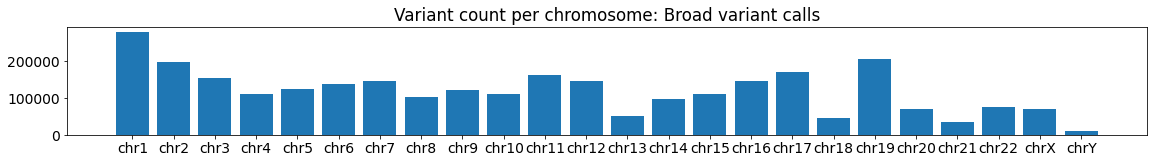

In [31]:
#barplots of chromosome counts
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,1.5)
plt.rcParams.update({'font.size': 14})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chroms,broad_chroms_plot)
plt.title("Variant count per chromosome: Broad variant calls")
plt.show()

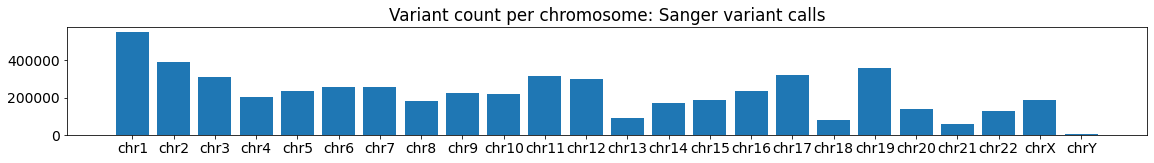

In [32]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chroms,sanger_chroms_plot)
plt.title("Variant count per chromosome: Sanger variant calls")
plt.show()

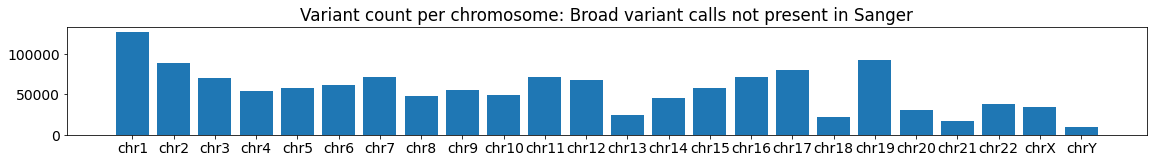

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chroms,broad_only_chroms_plot)
plt.title("Variant count per chromosome: Broad variant calls not present in Sanger")
plt.show()

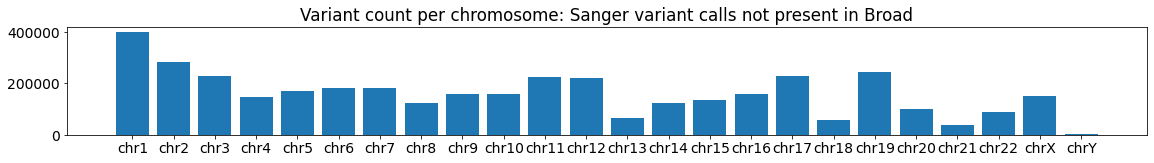

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(chroms,sanger_only_chroms_plot)
plt.title("Variant count per chromosome: Sanger variant calls not present in Broad")
plt.show()

In [40]:
#plot GQ
p = hl.plot.histogram(broad_mt.GQ, title="Broad variant calls: GQ")
show(p)

In [41]:
p = hl.plot.histogram(sanger_mt.GQ, title="Sanger variant calls: GQ")
show(p)

In [42]:
p = hl.plot.histogram(broad_only_mt.GQ, title="Broad variant calls not in Sanger: GQ")
show(p)

In [43]:
p = hl.plot.histogram(sanger_only_mt.GQ, title="Sanger variant calls not in Broad: GQ")
show(p)

In [48]:
#plot DP
p = hl.plot.histogram(broad_mt.DP, range=(0,50), bins=20, title="Broad variant calls: DP")
show(p)

In [49]:
p = hl.plot.histogram(sanger_mt.DP, range=(0,50), bins=20, title="Sanger variant calls: DP")
show(p)

In [50]:
p = hl.plot.histogram(broad_only_mt.DP, range=(0,50), bins=20, title="Broad variant calls not in Sanger: DP")
show(p)

In [51]:
p = hl.plot.histogram(sanger_only_mt.DP, range=(0,50), bins=20, title="Sanger variant calls not in Broad: DP")
show(p)

In [52]:
#run variant QC
sanger_mt = hl.variant_qc(sanger_mt)
broad_mt = hl.variant_qc(broad_mt)
broad_only_mt = hl.variant_qc(broad_only_mt)
sanger_only_mt = hl.variant_qc(sanger_only_mt)

In [53]:
sanger_mt.entries().show()

2022-08-02 15:17:44 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'


+---------------+------------+------+----------+----------+--------------+
| locus         | alleles    | rsid |     qual | filters  | info.AC      |
+---------------+------------+------+----------+----------+--------------+
| locus<GRCh38> | array<str> | str  |  float64 | set<str> | array<int32> |
+---------------+------------+------+----------+----------+--------------+
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
| chr1:69063    | ["T","C"]  | NA   | 2.63e+04 | NA       | [366]        |
+---------------+------------+------+----------+----------+--------------+

+----------------+---------+----------------------+----------------+
| info.AF        | info.AN | info.AS_BaseQRankSum | info.AS_FS     |
+----------------+---------+----------------------+----------------+
| array<float64> |   int32 | array<float64>       | array<float64> |
+----------------+---------+----------------------+----------------+
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
| [1.20e-02]     |   29946 | [0.00e+00]           | [1.21e+02]     |
+----------------+---------+----------------------+----------------+

+-------------------------+----------------+-------------------+
| info.AS_InbreedingCoeff | info.AS_MQ     | info.AS_MQRankSum |
+-------------------------+----------------+-------------------+
| array<float64>          | array<float64> | array<float64>    |
+-------------------------+----------------+-------------------+
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
| [3.78e-01]              | [2.51e+01]     | [-3.00e-01]       |
+-------------------------+----------------+-------------------+

+----------------+--------------------------+----------------+
| info.AS_QD     | info.AS_RAW_BaseQRankSum | info.AS_RAW_MQ |
+----------------+--------------------------+----------------+
| array<float64> | str                      | str            |
+----------------+--------------------------+----------------+
| [9.99e+00]     | NA                       | NA             |
| [9.99e+00]     | NA                       | NA             |
| [9.99e+00]     | NA                       | NA             |
| [9.99e+00]     | NA                       | NA             |
| [9.99e+00]     | NA                       | NA             |
| [9.99e+00]     | NA  

In [55]:
#plot call rate
p = hl.plot.histogram(broad_mt.variant_qc.call_rate, title="Broad variant calls: call rate")
show(p)

In [56]:
p = hl.plot.histogram(sanger_mt.variant_qc.call_rate, title="Sanger variant calls: call rate")
show(p)

In [57]:
p = hl.plot.histogram(broad_only_mt.variant_qc.call_rate, title="Broad variant calls not in Sanger: call rate")
show(p)

In [58]:
p = hl.plot.histogram(sanger_only_mt.variant_qc.call_rate, title="Sanger variant calls not in Broad: call rate")
show(p)

In [59]:
#split into SNPs and indels
sanger_mt_snp = sanger_mt.filter_rows(hl.is_snp(sanger_mt.alleles[0], sanger_mt.alleles[1]))
sanger_mt_indel = sanger_mt.filter_rows(hl.is_indel(sanger_mt.alleles[0], sanger_mt.alleles[1])) 

broad_mt_snp = broad_mt.filter_rows(hl.is_snp(broad_mt.alleles[0], broad_mt.alleles[1]))
broad_mt_indel = broad_mt.filter_rows(hl.is_indel(broad_mt.alleles[0], broad_mt.alleles[1])) 

sanger_only_mt_snp = sanger_only_mt.filter_rows(hl.is_snp(sanger_only_mt.alleles[0], sanger_only_mt.alleles[1]))
sanger_only_mt_indel = sanger_only_mt.filter_rows(hl.is_indel(sanger_only_mt.alleles[0], sanger_only_mt.alleles[1])) 

broad_only_mt_snp = broad_only_mt.filter_rows(hl.is_snp(broad_only_mt.alleles[0], broad_only_mt.alleles[1]))
broad_only_mt_indel = broad_only_mt.filter_rows(hl.is_indel(broad_only_mt.alleles[0], broad_only_mt.alleles[1])) 


In [78]:
#remove chrM from Broad
broad_mt_noM = broad_mt.filter_rows(broad_mt.locus.contig == 'chrM', keep = False)
broad_mt_snp_noM = broad_mt_snp.filter_rows(broad_mt_snp.locus.contig == 'chrM', keep = False)
broad_mt_indel_noM = broad_mt_indel.filter_rows(broad_mt_indel.locus.contig == 'chrM', keep = False)

broad_only_mt_noM = broad_only_mt.filter_rows(broad_only_mt.locus.contig == 'chrM', keep = False)
broad_only_mt_snp_noM = broad_only_mt_snp.filter_rows(broad_only_mt_snp.locus.contig == 'chrM', keep = False)
broad_only_mt_indel_noM = broad_only_mt_indel.filter_rows(broad_only_mt_indel.locus.contig == 'chrM', keep = False)

In [113]:
#spectra
broad_mt_snp_noM_snp_counts = broad_mt_snp_noM.aggregate_rows(hl.agg.counter(hl.Struct(ref=broad_mt_snp_noM.alleles[0], alt=broad_mt_snp_noM.alleles[1])))
broad_only_mt_snp_noM_counts = broad_only_mt_snp_noM.aggregate_rows(hl.agg.counter(hl.Struct(ref=broad_only_mt_snp_noM.alleles[0], alt=broad_only_mt_snp_noM.alleles[1])))

sanger_mt_snp_snp_counts = sanger_mt_snp.aggregate_rows(hl.agg.counter(hl.Struct(ref=sanger_mt_snp.alleles[0], alt=sanger_mt_snp.alleles[1])))
sanger_only_mt_snp_counts = sanger_only_mt_snp.aggregate_rows(hl.agg.counter(hl.Struct(ref=sanger_only_mt_snp.alleles[0], alt=sanger_only_mt_snp.alleles[1])))

In [92]:
broad_mt_snp_noM_snp_counts

frozendict({Struct(ref='A', alt='C'): 95179, Struct(ref='A', alt='G'): 263796, Struct(ref='A', alt='T'): 77226, Struct(ref='C', alt='A'): 129592, Struct(ref='C', alt='G'): 124813, Struct(ref='C', alt='T'): 527241, Struct(ref='G', alt='A'): 527189, Struct(ref='G', alt='C'): 126583, Struct(ref='G', alt='T'): 129065, Struct(ref='T', alt='A'): 80104, Struct(ref='T', alt='C'): 266429, Struct(ref='T', alt='G'): 92093})

In [112]:
broad_snp_counts = dict(broad_mt_snp_noM_snp_counts)
broad_snp_counts

{Struct(ref='A', alt='C'): 95179,
 Struct(ref='A', alt='G'): 263796,
 Struct(ref='A', alt='T'): 77226,
 Struct(ref='C', alt='A'): 129592,
 Struct(ref='C', alt='G'): 124813,
 Struct(ref='C', alt='T'): 527241,
 Struct(ref='G', alt='A'): 527189,
 Struct(ref='G', alt='C'): 126583,
 Struct(ref='G', alt='T'): 129065,
 Struct(ref='T', alt='A'): 80104,
 Struct(ref='T', alt='C'): 266429,
 Struct(ref='T', alt='G'): 92093}

In [115]:
broad_only_snp_counts = dict(broad_only_mt_snp_noM_counts)
broad_only_snp_counts

{Struct(ref='A', alt='C'): 51948,
 Struct(ref='A', alt='G'): 120367,
 Struct(ref='A', alt='T'): 42311,
 Struct(ref='C', alt='A'): 65276,
 Struct(ref='C', alt='G'): 54452,
 Struct(ref='C', alt='T'): 203713,
 Struct(ref='G', alt='A'): 204238,
 Struct(ref='G', alt='C'): 55184,
 Struct(ref='G', alt='T'): 65279,
 Struct(ref='T', alt='A'): 43670,
 Struct(ref='T', alt='C'): 122004,
 Struct(ref='T', alt='G'): 50898}

In [116]:
sanger_snp_counts = dict(sanger_mt_snp_snp_counts)
sanger_snp_counts

{Struct(ref='A', alt='C'): 61808,
 Struct(ref='A', alt='G'): 151172,
 Struct(ref='A', alt='T'): 44383,
 Struct(ref='C', alt='A'): 1904432,
 Struct(ref='C', alt='G'): 79130,
 Struct(ref='C', alt='T'): 345027,
 Struct(ref='G', alt='A'): 344995,
 Struct(ref='G', alt='C'): 79412,
 Struct(ref='G', alt='T'): 1912479,
 Struct(ref='T', alt='A'): 47112,
 Struct(ref='T', alt='C'): 152546,
 Struct(ref='T', alt='G'): 61119}

In [117]:
sanger_only_snp_counts = dict(sanger_only_mt_snp_counts)
sanger_only_snp_counts

{Struct(ref='A', alt='C'): 18577,
 Struct(ref='A', alt='G'): 7743,
 Struct(ref='A', alt='T'): 9468,
 Struct(ref='C', alt='A'): 1840116,
 Struct(ref='C', alt='G'): 8769,
 Struct(ref='C', alt='T'): 21499,
 Struct(ref='G', alt='A'): 22044,
 Struct(ref='G', alt='C'): 8013,
 Struct(ref='G', alt='T'): 1848693,
 Struct(ref='T', alt='A'): 10678,
 Struct(ref='T', alt='C'): 8121,
 Struct(ref='T', alt='G'): 19924}

In [118]:
sanger_only_snp_counts[list(sanger_only_snp_counts.keys())[0]]

18577

In [119]:
allsubs = ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G']

In [127]:
broad_subs = []
broad_only_subs = []
sanger_subs = []
sanger_only_subs = []
for i in range(0, len(allsubs)):
    broad_subs.append(broad_snp_counts[list(broad_snp_counts.keys())[i]])
    broad_only_subs.append(broad_only_snp_counts[list(broad_only_snp_counts.keys())[i]])
    sanger_subs.append(sanger_snp_counts[list(sanger_snp_counts.keys())[i]])
    sanger_only_subs.append(sanger_only_snp_counts[list(sanger_only_snp_counts.keys())[i]])

In [122]:
sanger_only_subs

[18577,
 7743,
 9468,
 1840116,
 8769,
 21499,
 22044,
 8013,
 1848693,
 10678,
 8121,
 19924]

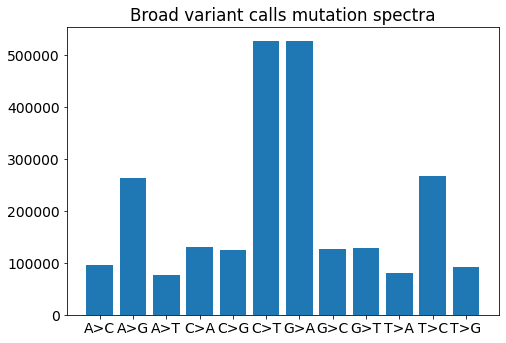

In [125]:
plt.rcParams["figure.figsize"] = (6,4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,broad_subs)
plt.title("Broad variant calls mutation spectra")
plt.show()

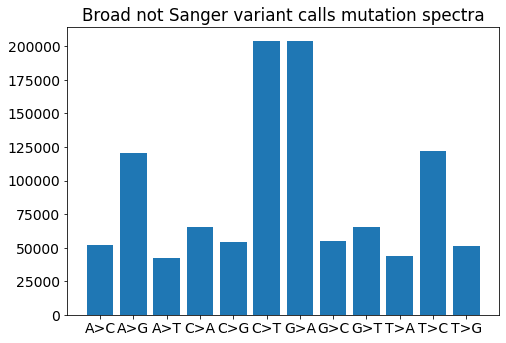

In [128]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,broad_only_subs)
plt.title("Broad not Sanger variant calls mutation spectra")
plt.show()

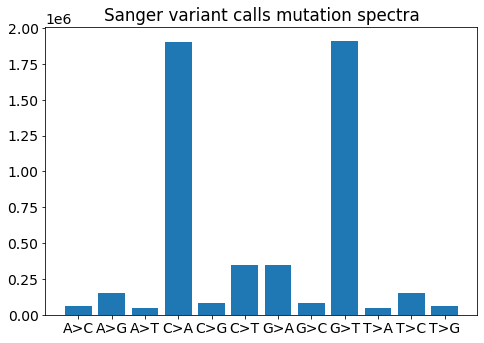

In [129]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,sanger_subs)
plt.title("Sanger variant calls mutation spectra")
plt.show()

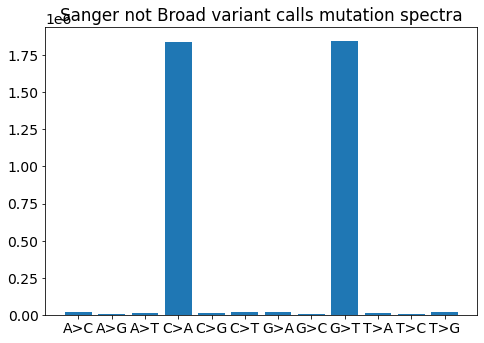

In [130]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,sanger_only_subs)
plt.title("Sanger not Broad variant calls mutation spectra")
plt.show()

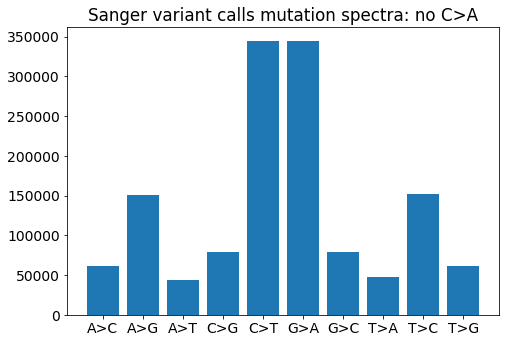

In [131]:
#in sanger plots C>A dwarfes everything else so plot without
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs[0:3] + allsubs[4:8] + allsubs[9:12], sanger_subs[0:3] + sanger_subs[4:8] + sanger_subs[9:12])
plt.title("Sanger variant calls mutation spectra: no C>A")
plt.show()

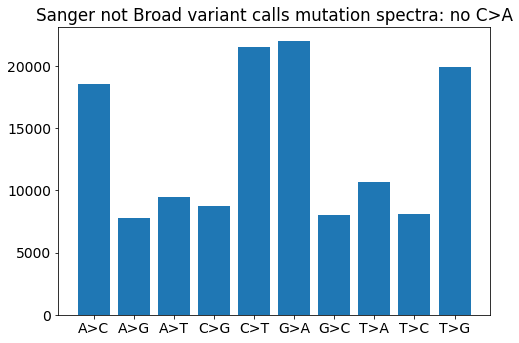

In [133]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs[0:3] + allsubs[4:8] + allsubs[9:12], sanger_only_subs[0:3] + sanger_only_subs[4:8] + sanger_only_subs[9:12])
plt.title("Sanger not Broad variant calls mutation spectra: no C>A")
plt.show()

In [134]:
#annotate sanger mt with RF bin
rf_htfile = lustre_dir +  "/variant_qc_random_forest/1ed4bbbc/_gnomad_score_binning_tmp.ht"
rf_ht = hl.read_table(rf_htfile)

sanger_mt = sanger_mt.annotate_rows(
    info=sanger_mt.info.annotate(
    rf_bin=rf_ht[sanger_mt.row_key].bin)
)

In [136]:
sanger_only_mt = sanger_only_mt.annotate_rows(
    info=sanger_only_mt.info.annotate(
    rf_bin=rf_ht[sanger_only_mt.row_key].bin)
)

sanger_mt_snp = sanger_mt_snp.annotate_rows(
    info=sanger_mt_snp.info.annotate(
    rf_bin=rf_ht[sanger_mt_snp.row_key].bin)
)

sanger_only_mt_snp = sanger_only_mt_snp.annotate_rows(
    info=sanger_only_mt_snp.info.annotate(
    rf_bin=rf_ht[sanger_only_mt_snp.row_key].bin)
)


In [139]:
#sanger_mt_rf_pass = sanger_mt.filter_rows(sanger_mt.info.rf_bin <= 37)
#sanger_only_mt_rf_pass = sanger_only_mt.filter_rows(sanger_only_mt.info.rf_bin <= 37)
#sanger_mt_snp_rf_pass = sanger_mt_snp.filter_rows(sanger_mt_snp.info.rf_bin <= 37)
#sanger_only_mt_snp_rf_pass = sanger_only_mt_snp.filter_rows(sanger_only_mt_snp.info.rf_bin <= 37)

In [14]:
#repeat analysis after variant QC and filtering Broad to exonic regions
broad_mtfile = lustre_dir + "matrixtables/gatk_calls_from_broad_samples_in_sanger.mt"
broad_mt = hl.read_matrix_table(broad_mtfile)
broad_mt.count()

(1616636, 2506)

In [15]:
sanger_mtfile_rf_pass = lustre_dir + "matrixtables/gatk_calls_from_sanger_samples_in_broad_after_rf.mt"
sanger_mt_after_rf = hl.read_matrix_table(sanger_mtfile_rf_pass)
sanger_mt_after_rf.count()

(1628267, 2506)

In [16]:
sanger_only_mtfile_rf_pass = lustre_dir + "matrixtables/sanger_variants_not_in_broad_after_rf.mt"
sanger_only_mt_after_rf = hl.read_matrix_table(sanger_only_mtfile_rf_pass)
sanger_only_mt_after_rf.count()

(226573, 2506)

In [17]:
broad_only_mtfile_rf_pass = lustre_dir + "matrixtables/broad_variants_not_in_sanger_after_rf.mt"
broad_only_mt_after_rf = hl.read_matrix_table(broad_only_mtfile_rf_pass)
broad_only_mt_after_rf.count()

(214942, 2506)

In [18]:
#split mts into SNPs and indels
broad_mt_snp = broad_mt.filter_rows(hl.is_snp(broad_mt.alleles[0], broad_mt.alleles[1]))
broad_mt_snp.count()

(1407728, 2506)

In [19]:
broad_mt_indel = broad_mt.filter_rows(hl.is_indel(broad_mt.alleles[0], broad_mt.alleles[1]))
broad_mt_indel.count()

(208907, 2506)

In [20]:
sanger_mt_snp_rf_pass = sanger_mt_after_rf.filter_rows(hl.is_snp(sanger_mt_after_rf.alleles[0], sanger_mt_after_rf.alleles[1]))
sanger_mt_snp_rf_pass.count()

(1489279, 2506)

In [21]:
sanger_mt_indel_rf_pass = sanger_mt_after_rf.filter_rows(hl.is_indel(sanger_mt_after_rf.alleles[0], sanger_mt_after_rf.alleles[1]))
sanger_mt_indel_rf_pass.count()

(138988, 2506)

In [22]:
sanger_only_mt_snp_rf_pass = sanger_only_mt_after_rf.filter_rows(hl.is_snp(sanger_only_mt_after_rf.alleles[0], sanger_only_mt_after_rf.alleles[1]))
sanger_only_mt_snp_rf_pass.count()

(213691, 2506)

In [23]:
sanger_only_mt_indel_rf_pass = sanger_only_mt_after_rf.filter_rows(hl.is_indel(sanger_only_mt_after_rf.alleles[0], sanger_only_mt_after_rf.alleles[1]))
sanger_only_mt_indel_rf_pass.count()

(12882, 2506)

In [24]:
broad_only_mt_snp_rf_pass = broad_only_mt_after_rf.filter_rows(hl.is_snp(broad_only_mt_after_rf.alleles[0], broad_only_mt_after_rf.alleles[1]))
broad_only_mt_snp_rf_pass.count()

(132140, 2506)

In [25]:
broad_only_mt_indel_rf_pass = broad_only_mt_after_rf.filter_rows(hl.is_indel(broad_only_mt_after_rf.alleles[0], broad_only_mt_after_rf.alleles[1]))
broad_only_mt_indel_rf_pass.count()

(82801, 2506)

In [159]:
#post-RF mutation spectra
#first remove chrM from Broad
broad_mt_noM = broad_mt.filter_rows(broad_mt.locus.contig == 'chrM', keep = False)
broad_mt_snp_noM = broad_mt_snp.filter_rows(broad_mt_snp.locus.contig == 'chrM', keep = False)
broad_mt_indel_noM = broad_mt_indel.filter_rows(broad_mt_indel.locus.contig == 'chrM', keep = False)

broad_only_mt_noM_rfpass = broad_only_mt_after_rf.filter_rows(broad_only_mt_after_rf.locus.contig == 'chrM', keep = False)
broad_only_mt_snp_noM_rfpass = broad_only_mt_snp_rf_pass.filter_rows(broad_only_mt_snp_rf_pass.locus.contig == 'chrM', keep = False)
broad_only_mt_indel_noM_rfpass = broad_only_mt_indel_rf_pass.filter_rows(broad_only_mt_indel_rf_pass.locus.contig == 'chrM', keep = False)

In [161]:
#spectra
#broad_mt_snp_noM_snp_counts = broad_mt_snp_noM.aggregate_rows(hl.agg.counter(hl.Struct(ref=broad_mt_snp_noM.alleles[0], alt=broad_mt_snp_noM.alleles[1])))
broad_only_mt_snp_noM_counts_rf_pass = broad_only_mt_snp_noM_rfpass.aggregate_rows(hl.agg.counter(hl.Struct(ref=broad_only_mt_snp_noM_rfpass.alleles[0], alt=broad_only_mt_snp_noM_rfpass.alleles[1])))

sanger_mt_snp_snp_counts_rf_pass = sanger_mt_snp_rf_pass.aggregate_rows(hl.agg.counter(hl.Struct(ref=sanger_mt_snp_rf_pass.alleles[0], alt=sanger_mt_snp_rf_pass.alleles[1])))
sanger_only_mt_snp_count_rf_pass = sanger_only_mt_snp_rf_pass.aggregate_rows(hl.agg.counter(hl.Struct(ref=sanger_only_mt_snp_rf_pass.alleles[0], alt=sanger_only_mt_snp_rf_pass.alleles[1])))

In [162]:
#convert to dict
broad_only_snp_counts_rf_pass = dict(broad_only_mt_snp_noM_counts_rf_pass)
sanger_snp_counts_rf_pass = dict(sanger_mt_snp_snp_counts_rf_pass)
sanger_only_snp_counts_rf_pass = dict(sanger_only_mt_snp_count_rf_pass)

In [163]:
allsubs = ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G']
#broad_subs = []
broad_only_subs_rf_pass = []
sanger_subs_rf_pass = []
sanger_only_subs_rf_pass = []
for i in range(0, len(allsubs)):
#    broad_subs.append(broad_snp_counts[list(broad_snp_counts.keys())[i]])
    broad_only_subs_rf_pass.append(broad_only_snp_counts_rf_pass[list(broad_only_snp_counts_rf_pass.keys())[i]])
    sanger_subs_rf_pass.append(sanger_snp_counts_rf_pass[list(sanger_snp_counts_rf_pass.keys())[i]])
    sanger_only_subs_rf_pass.append(sanger_only_snp_counts_rf_pass[list(sanger_only_snp_counts_rf_pass.keys())[i]])

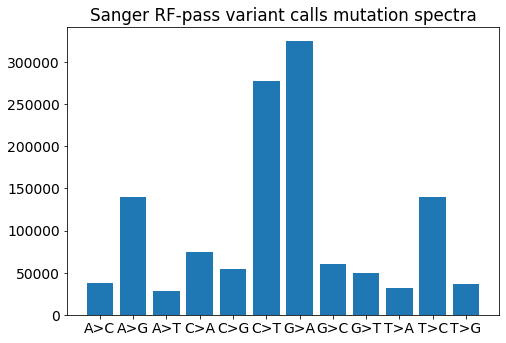

In [165]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,sanger_subs_rf_pass)
plt.title("Sanger RF-pass variant calls mutation spectra")
plt.show()

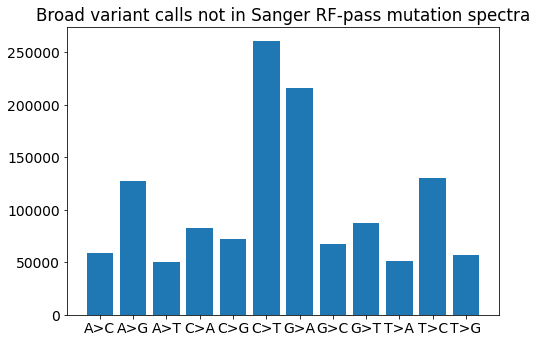

In [166]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,broad_only_subs_rf_pass)
plt.title("Broad variant calls not in Sanger RF-pass mutation spectra")
plt.show()

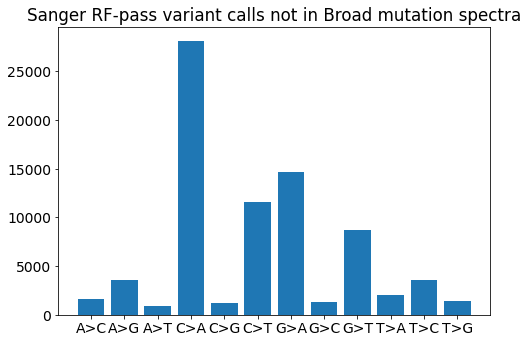

In [167]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,sanger_only_subs_rf_pass)
plt.title("Sanger RF-pass variant calls not in Broad mutation spectra")
plt.show()

In [173]:
#get expected mutation spectrum
gnomad_htfile = lustre_dir + "/resources/gnomad_v3-0_AF.ht"
gnomad_ht = hl.read_table(gnomad_htfile)

In [174]:
gnomad_ht.show()

,,,,,,
chrom,position,ref,alt,locus,alleles,maf
str,int32,str,str,locus<GRCh38>,array<str>,float64
"""chr1""",10031,"""T""","""C""",chr1:10031,"[""T"",""C""]",0.00e+00
"""chr1""",10037,"""T""","""C""",chr1:10037,"[""T"",""C""]",2.75e-05
"""chr1""",10043,"""T""","""C""",chr1:10043,"[""T"",""C""]",1.23e-05
"""chr1""",10055,"""T""","""C""",chr1:10055,"[""T"",""C""]",1.12e-05
"""chr1""",10057,"""A""","""C""",chr1:10057,"[""A"",""C""]",2.79e-05
"""chr1""",10061,"""T""","""C""",chr1:10061,"[""T"",""C""]",0.00e+00
"""chr1""",10061,"""T""","""TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC""",chr1:10061,"[""T"",""TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC""]",0.00e+00
"""chr1""",10064,"""C""","""CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAAA""",chr1:10064,"[""C"",""CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAAA""]",0.00e+00


In [176]:
#annotated sanger RF-pass snps with gnomad af
sanger_mt_snp_rf_pass_af = sanger_mt_snp_rf_pass.annotate_rows(gnomad_af=gnomad_ht[sanger_mt_snp_rf_pass.row_key].maf) 
sanger_mt_snp_rf_pass_af.rows().show()

+---------------+------------+---------------+----------+----------+
| locus         | alleles    | rsid          |     qual | filters  |
+---------------+------------+---------------+----------+----------+
| locus<GRCh38> | array<str> | str           |  float64 | set<str> |
+---------------+------------+---------------+----------+----------+
| chr1:69063    | ["T","C"]  | NA            | 2.63e+04 | NA       |
| chr1:69224    | ["A","T"]  | "rs568964432" | 7.70e+02 | NA       |
| chr1:69270    | ["A","G"]  | "rs201219564" | 2.11e+06 | NA       |
| chr1:69428    | ["T","G"]  | "rs140739101" | 1.88e+05 | NA       |
| chr1:69438    | ["T","C"]  | "rs758790416" | 2.56e+03 | NA       |
| chr1:69511    | ["A","G"]  | "rs2691305"   | 1.10e+07 | NA       |
| chr1:69761    | ["A","T"]  | "rs200505207" | 3.34e+05 | NA       |
| chr1:69869    | ["T","A"]  | "rs548049170" | 2.01e+03 | NA       |
| chr1:69897    | ["T","C"]  | "rs200676709" | 1.21e+06 | NA       |
| chr1:69915    | ["G","T"]  | NA            | 5.07e+01 | NA       |
+---------------+------------+---------------+----------+----------+

+--------------+----------------+---------+----------------------+
| info.AC      | info.AF        | info.AN | info.AS_BaseQRankSum |
+--------------+----------------+---------+----------------------+
| array<int32> | array<float64> |   int32 | array<float64>       |
+--------------+----------------+---------+----------------------+
| [366]        | [1.20e-02]     |   29946 | [0.00e+00]           |
| [7]          | [2.34e-04]     |   29946 | [0.00e+00]           |
| [15144]      | [5.06e-01]     |   29946 | [0.00e+00]           |
| [733]        | [2.40e-02]     |   29946 | [-6.00e-01]          |
| [6]          | [2.00e-04]     |   29946 | [1.30e+00]           |
| [18386]      | [6.14e-01]     |   29946 | [-4.00e-01]          |
| [2072]       | [6.90e-02]     |   29946 | [0.00e+00]           |
| [9]          | [3.01e-04]     |   29946 | [0.00e+00]           |
| [5701]       | [1.90e-01]     |   29946 | [0.00e+00]           |
| [2]          | [6.68e-05]     |   29946 | NA                   |
+--------------+----------------+---------+----------------------+

+----------------+-------------------------+----------------+
| info.AS_FS     | info.AS_InbreedingCoeff | info.AS_MQ     |
+----------------+-------------------------+----------------+
| array<float64> | array<float64>          | array<float64> |
+----------------+-------------------------+----------------+
| [1.21e+02]     | [3.78e-01]              | [2.51e+01]     |
| [1.13e+01]     | [4.36e-01]              | [2.92e+01]     |
| [0.00e+00]     | [4.54e-01]              | [2.87e+01]     |
| [1.23e+01]     | [5.93e-01]              | [3.03e+01]     |
| [0.00e+00]     | [5.93e-01]              | [3.25e+01]     |
| [0.00e+00]     | [5.64e-01]              | [3.67e+01]     |
| [3.99e+01]     | [4.30e-01]              | [3.11e+01]     |
| [9.73e+00]     | [4.11e-01]              | [3.02e+01]     |
| [4.64e+01]     | [3.51e-01]              | [2.98e+01]     |
| [0.00e+00]     | [4.34e-01]              | [2.50e+01]     |
+----------------+-------------------------+----------------+

+-------------------+----------------+--------------------------+
| info.AS_MQRankSum | info.AS_QD     | info.AS_RAW_BaseQRankSum |
+-------------------+----------------+--------------------------+
| array<float64>    | array<float64> | str                      |
+-------------------+----------------+--------------------------+
| [-3.00e-01]       | [9.99e+00]     | NA                       |
| [1.00e-01]        | [2.14e+01]     | NA                       |
| [3.00e-01]        | [3.41e+01]     | NA                       |
| [-1.50e+00]       | [1.44e+01]     | NA                       |
| [-8.00e-01]       | [1.96e+01]     | NA                       |
| [-5.40e+00]       | [3.19e+01]     | NA                       |
| [5.00e-01]        | [1.80e+01]     | NA                       |
| [1.10e+00]        | [1.26e+01]     

In [178]:
common_vars_in_sanger = sanger_mt_snp_rf_pass_af.filter_rows(sanger_mt_snp_rf_pass_af.gnomad_af >= 0.1)
common_vars_in_sanger.count()

(97852, 2506)

In [180]:
common_var_counts = common_vars_in_sanger.aggregate_rows(hl.agg.counter(hl.Struct(ref=common_vars_in_sanger.alleles[0], alt=common_vars_in_sanger.alleles[1])))
common_var_counts_dict = dict(common_var_counts)

In [181]:
allsubs = ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G']
common = []
for i in range(0, len(allsubs)):
    common.append(common_var_counts_dict[list(common_var_counts_dict.keys())[i]])
    
print(common)

[3482, 16714, 2331, 4035, 4462, 17162, 19865, 4572, 3418, 2582, 15741, 3488]


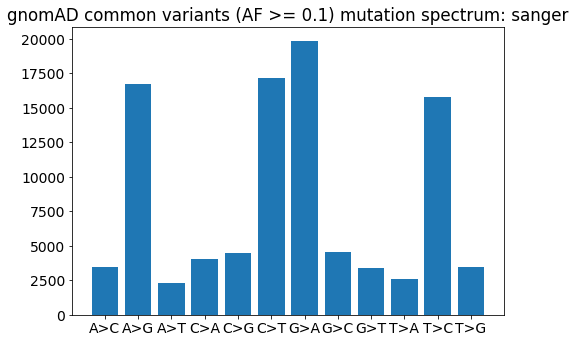

In [191]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,common)
plt.title("gnomAD common variants (AF >= 0.1) mutation spectrum: sanger")
plt.show()

In [186]:
#repeat the common var mutation spectrum for broad - need to remake broad mt as something is corrupt
broad_mtfile = lustre_dir + 'matrixtables/gatk_calls_from_broad_samples_in_sanger.mt'
broad_mt = hl.read_matrix_table(broad_mtfile)
broad_mt_snp = broad_mt.filter_rows(hl.is_snp(broad_mt.alleles[0], broad_mt.alleles[1]))
broad_mt_snp_noM = broad_mt_snp.filter_rows(broad_mt_snp.locus.contig == 'chrM', keep = False)

broad_af = broad_mt_snp_noM.annotate_rows(gnomad_af=gnomad_ht[broad_mt_snp_noM.row_key].maf) 

In [187]:
common_vars_in_broad = broad_af.filter_rows(broad_af.gnomad_af >= 0.1)
common_vars_in_broad.count()

(265430, 2506)

In [188]:
common_var_counts_broad = common_vars_in_broad.aggregate_rows(hl.agg.counter(hl.Struct(ref=common_vars_in_broad.alleles[0], alt=common_vars_in_broad.alleles[1])))
common_var_counts_broad_dict = dict(common_var_counts_broad)

In [189]:
allsubs = ['A>C', 'A>G', 'A>T', 'C>A', 'C>G', 'C>T', 'G>A', 'G>C', 'G>T', 'T>A', 'T>C', 'T>G']
common_broad = []
for i in range(0, len(allsubs)):
    common_broad.append(common_var_counts_broad_dict[list(common_var_counts_broad_dict.keys())[i]])
    
print(common_broad)

[10592, 42754, 7413, 10694, 13523, 47671, 48140, 13641, 10757, 7382, 42818, 10045]


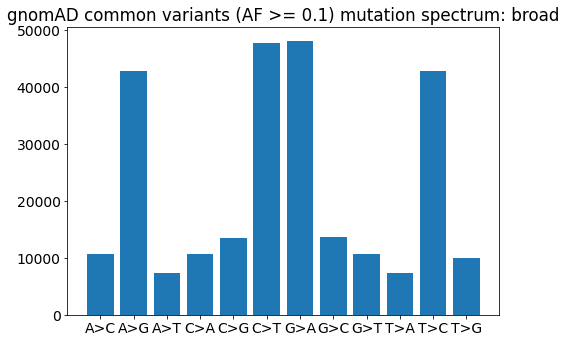

In [190]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(allsubs,common_broad)
plt.title("gnomAD common variants (AF >= 0.1) mutation spectrum: broad")
plt.show()